# P165- Hotel Rating Classification 

In [1]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import string
import nltk
import spacy
#from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import en_core_web_sm
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
nltk.download('stopwords')
import re
from nltk import pos_tag

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nehas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#loading hotel review excel file in python
book=pd.read_excel("C:\\Users\\nehas\\Dropbox\\PC\\Downloads\\hotel_reviews.xlsx")

In [8]:
book

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


### Data Understanding

In [9]:
book.shape

(20491, 2)

In [10]:
len(book)

20491

In [11]:
book[book.duplicated()].shape

(0, 2)

In [12]:
book.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [13]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [14]:
book['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [15]:
book.isnull().sum()

Review    0
Rating    0
dtype: int64

## Visualization 

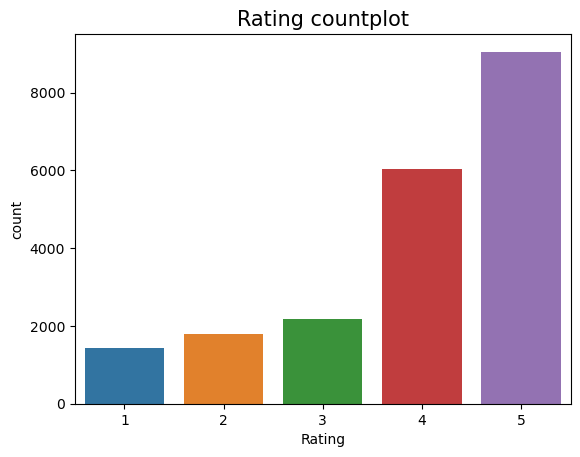

In [16]:
# count plot for rating
sns.countplot(book['Rating'])
plt.title('Rating countplot',size=15)
plt.show()

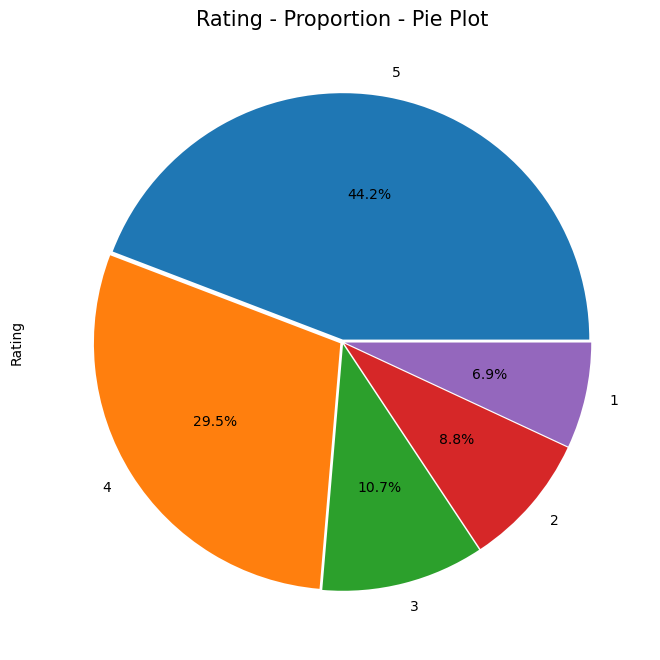

In [17]:
plt.figure(figsize=(8,8))
book.Rating.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01,0.01,0.01],autopct='%.1f%%')
plt.title('Rating - Proportion - Pie Plot',size=15)
plt.show()

### Rating analysis

In [18]:
def rating_analysis(Rating):
    if Rating==1 or Rating==2:
        return 'Negative'
    elif Rating==4 or Rating==5:
        return 'Positive'
    else:
        return 'Neutral'

In [19]:
book['rating_analysis']=book['Rating'].apply(lambda x:rating_analysis(x)) 
book['rating_analysis'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: rating_analysis, dtype: int64

Text(0.5, 1.0, 'Rating analysis : COUNTPLOT')

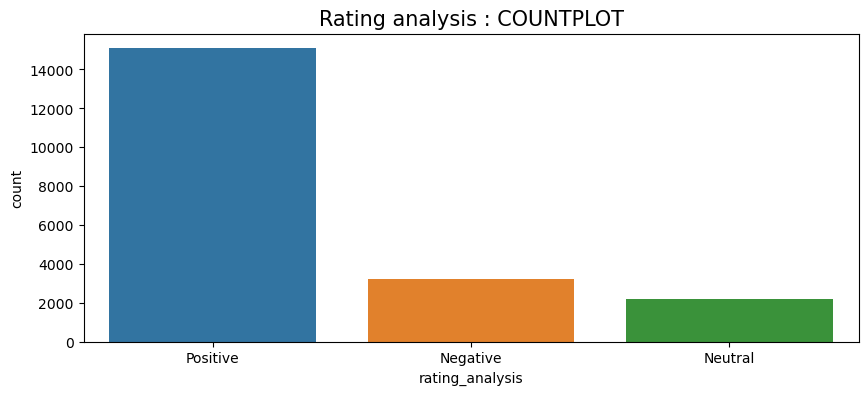

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(book.rating_analysis)
plt.title('Rating analysis : COUNTPLOT',size=15)

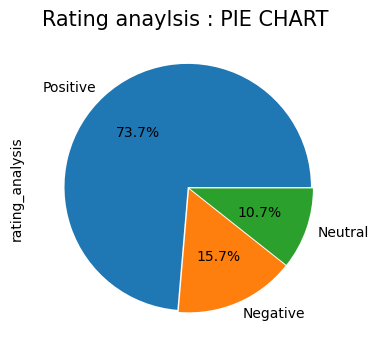

In [21]:
plt.figure(figsize=(10,4))
book['rating_analysis'].value_counts().plot(kind='pie',explode=[0.01,0.01,0.01],autopct='%.1f%%')
plt.title('Rating anaylsis : PIE CHART ',size=15)
plt.show()

In [22]:
book.isnull().sum()

Review             0
Rating             0
rating_analysis    0
dtype: int64

In [23]:
count=book.isnull().sum().sort_values(ascending=True)
count

Review             0
Rating             0
rating_analysis    0
dtype: int64

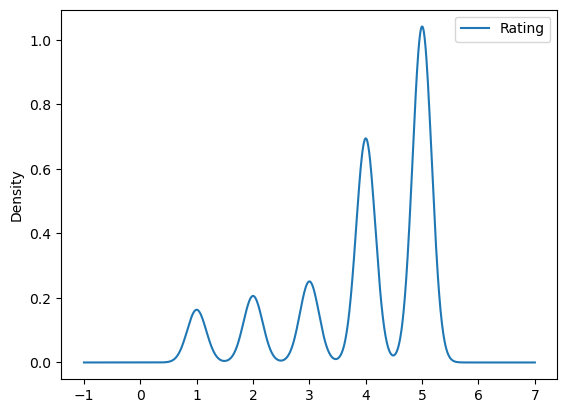

<Figure size 1000x400 with 0 Axes>

In [24]:
# univariente density plot
book.plot(kind='density',subplots=True,layout=[1,1],sharex=False)
plt.figure(figsize=(10,4))
plt.show()

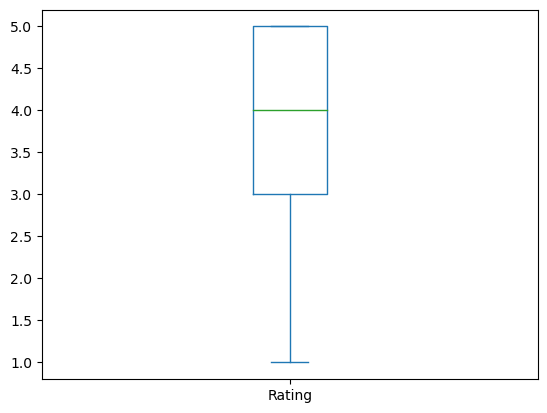

<Figure size 800x300 with 0 Axes>

In [25]:
# box and whisker plot
book.plot(kind='box',subplots=[1,1],sharex=False,sharey=False)
plt.figure(figsize=(8,3))
plt.show()

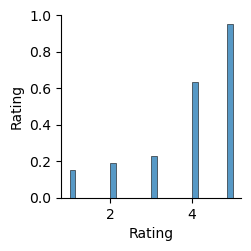

<Figure size 1200x800 with 0 Axes>

In [26]:
# pairplot 
sns.pairplot(book)
plt.figure(figsize=(12,8))
plt.show()

## Exploratory Data Analysis

###  Tokenization

In [27]:

def clean_data(text):
        text=text.lower()
        text=re.sub("\[.*?\]","",text)
        text=re.sub('\S*https?:\S*',"",text)
        text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
        text=re.sub("\w*\d\w*","",text)
        text=re.sub("\n","",text)
        text=re.sub(' +', " ", text)
        return text



clean=lambda x : clean_data(x)

In [28]:
book['clean_review']=book['Review'].apply(clean)
book# data is cleaned

,Review,Rating,rating_analysis,clean_review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms not experience hotel monaco seattle...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm not ca nt ...
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok just looks nice modern outside desk staff n...
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...


Text(0.5, 1.0, 'Word Frequency before removing stop words')

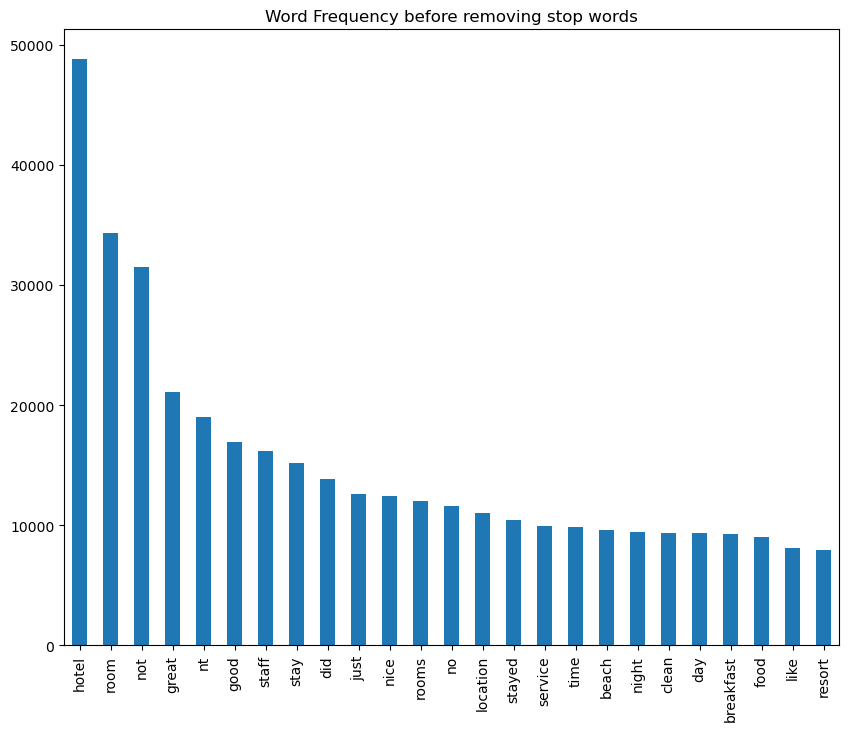

In [29]:
# word frequency before removing stopwords
word_freq=pd.Series(''.join(book['clean_review']).split()).value_counts()[:25]
word_freq.plot(kind='bar',figsize=(10,8))
plt.title('Word Frequency before removing stop words')

In [30]:
stop=stopwords.words('english')
my_stop=pd.Series(stop)
my_stop

0             i
1            me
2            my
3        myself
4            we
         ...   
174     weren't
175         won
176       won't
177      wouldn
178    wouldn't
Length: 179, dtype: object

In [31]:
add_word=['nt']
stop_words=my_stop.append(pd.Series(add_word),ignore_index=True)

In [32]:
book['clean_review']=book['clean_review'].apply(lambda x : " ".join(x for x in x.split() if x not in list(stop_words)))
book

,Review,Rating,rating_analysis,clean_review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm ca beat ti...
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok looks nice modern outside desk staff partic...
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...


Text(0.5, 1.0, '25 Most Frequent Words After Removing Stopwords')

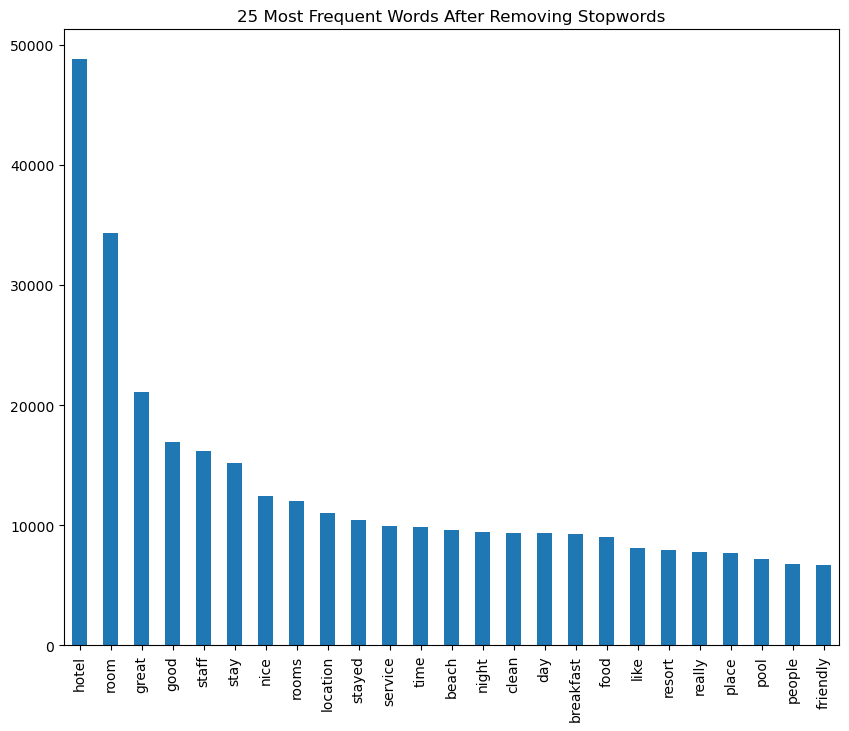

In [33]:
word_freq1=pd.Series(' '.join(book['clean_review']).split()).value_counts()[:25]
word_freq1.plot(kind='bar',figsize=(10,8))
plt.title('25 Most Frequent Words After Removing Stopwords')

### Lemmitization

In [34]:
lemmatizer=WordNetLemmatizer()
w_tokenizer=WhitespaceTokenizer()

In [35]:
def lemmatize(txt):
    list_review=[lemmatizer.lemmatize(word=word, pos=tag[0].lower()) 
                 if tag[0].lower() in ['a','r','n','v'] else word for word, tag in pos_tag(w_tokenizer.tokenize(txt))]
    return (' '.join([x for x in list_review if x]))

In [36]:
book['Lemmitize_review']=book['clean_review'].apply(lambda x :lemmatize(x))

In [37]:
book

,Review,Rating,rating_analysis,clean_review,Lemmitize_review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm ca beat ti...,best kept secret time stay charm ca beat time ...
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok looks nice modern outside desk staff partic...,ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...,hotel theft ruin vacation hotel open sept gues...


In [38]:
book['clean_review'][1000]

'shame hotel wasnt good restaurant arrived clift late afternoon struggle luggage bags reception staff unhelpful uninterested eventually managed sorted shown room floor room suite tried make separate living room putting curtain inbetween bedroom living room bathroom tiny dirty stayed mum unfortunatley night didnt feel suffering bad foot decided phone reception ask doctor come hotel told ther wasnt local receptionist closest told phone eventually decided hospital safe came hospital evening doormen talking girls outside let following night ate hotel restaurant aisa cuba fantastic think hotel intrest restaurant bar end day sleeping ignored wouldnt stay'

In [39]:
len(word_tokenize(book['clean_review'][1000]))

93

In [40]:
len(book['clean_review'][1000])

655

In [41]:
book['Lemmitize_review'][1000]

'shame hotel wasnt good restaurant arrive clift late afternoon struggle luggage bags reception staff unhelpful uninterested eventually manage sort show room floor room suite try make separate living room put curtain inbetween bedroom living room bathroom tiny dirty stay mum unfortunatley night didnt feel suffer bad foot decide phone reception ask doctor come hotel tell ther wasnt local receptionist closest tell phone eventually decide hospital safe come hospital even doorman talk girl outside let follow night ate hotel restaurant aisa cuba fantastic think hotel intrest restaurant bar end day sleep ignore wouldnt stay'

In [42]:
len(word_tokenize(book['Lemmitize_review'][1000]))

93

In [43]:
len(book['Lemmitize_review'][1000])

623

### view at lemmitized data with respect to ratings

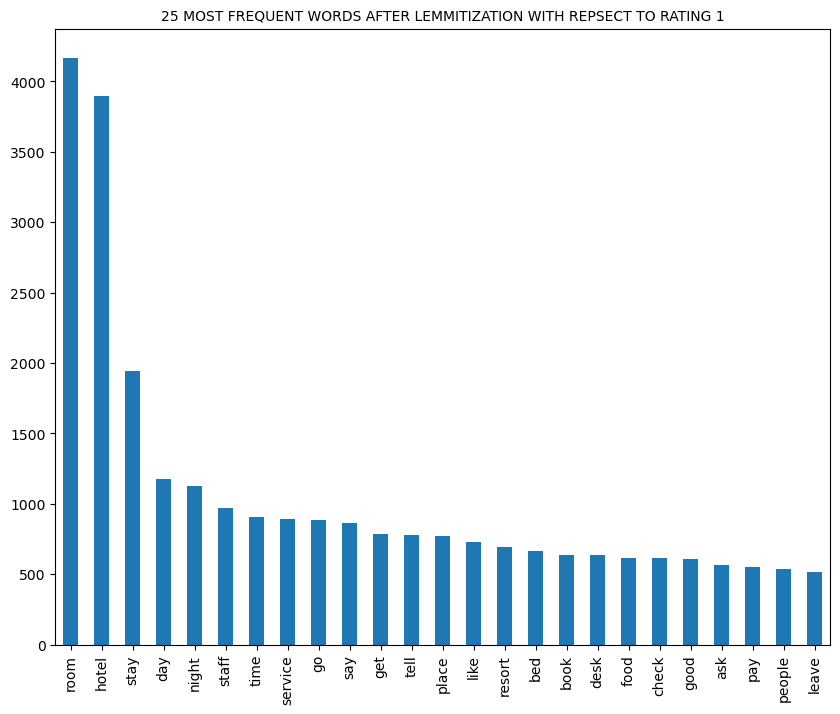

In [44]:
rating=pd.Series(' '.join(book[book['Rating']==1]['Lemmitize_review']).split()).value_counts()[:25]
rating.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMITIZATION WITH REPSECT TO RATING 1',size=10)
plt.show()

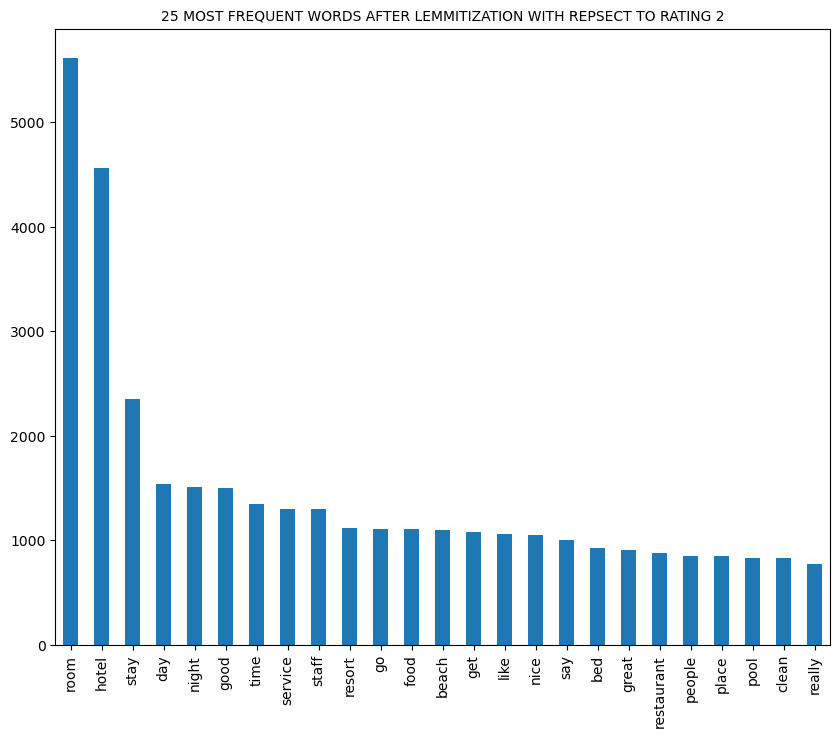

In [45]:
rating_second=pd.Series(' '.join(book[book['Rating']==2]['Lemmitize_review']).split()).value_counts()[:25]
rating_second.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMITIZATION WITH REPSECT TO RATING 2',size=10)
plt.show()

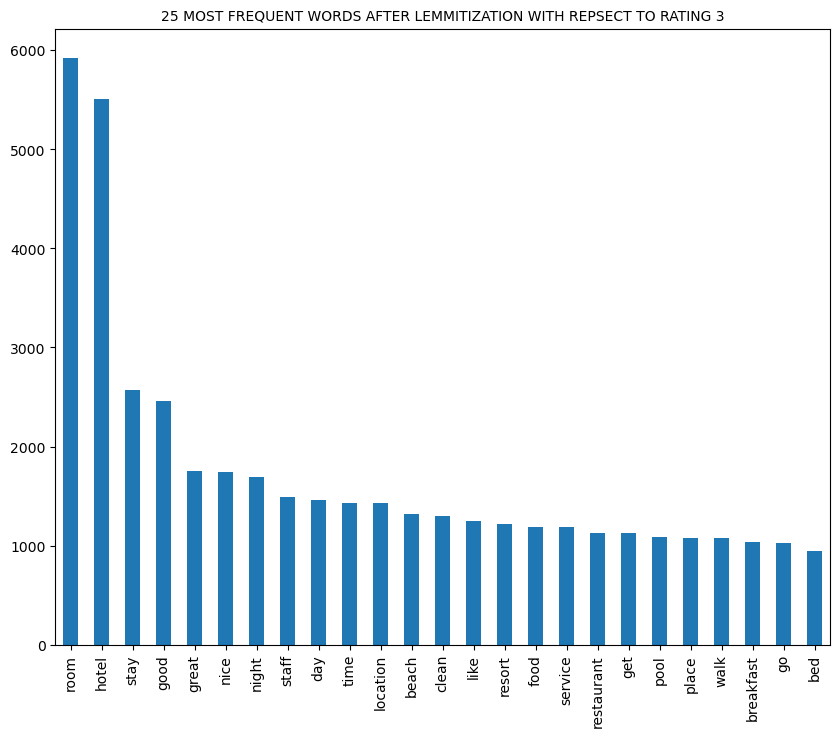

In [46]:
rating_second=pd.Series(' '.join(book[book['Rating']==3]['Lemmitize_review']).split()).value_counts()[:25]
rating_second.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMITIZATION WITH REPSECT TO RATING 3',size=10)
plt.show()

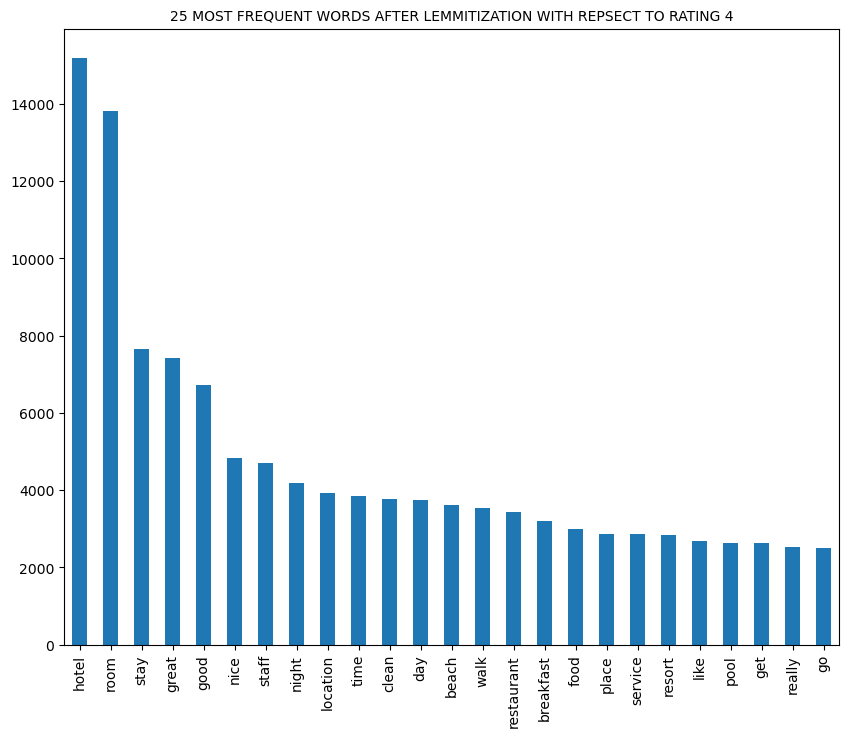

In [47]:
rating_fourth=pd.Series(' '.join(book[book['Rating']==4]['Lemmitize_review']).split()).value_counts()[:25]
rating_fourth.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMITIZATION WITH REPSECT TO RATING 4',size=10)
plt.show()

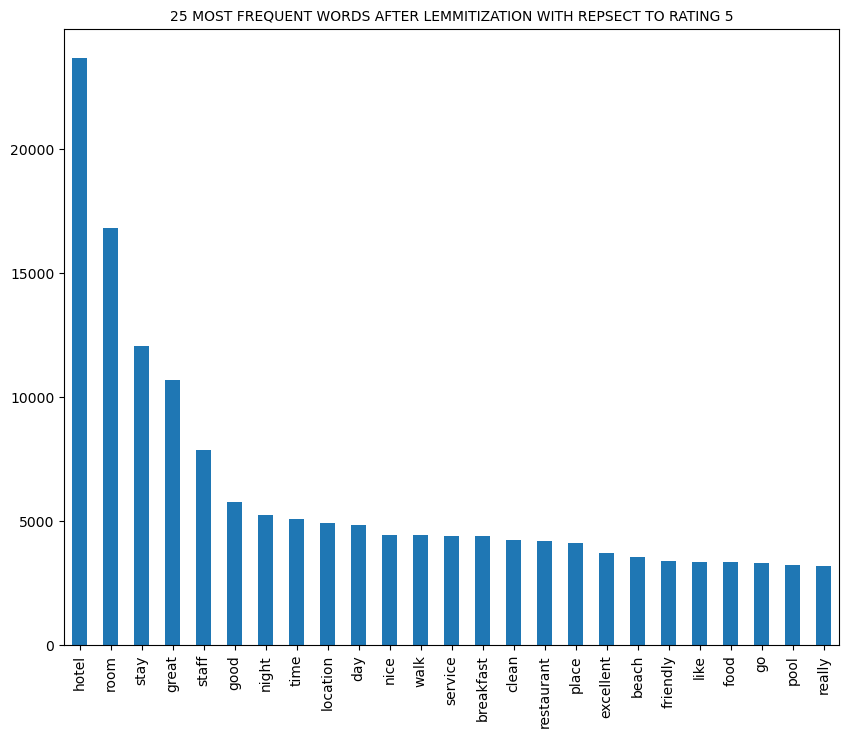

In [48]:
rating_fifth=pd.Series(' '.join(book[book['Rating']==5]['Lemmitize_review']).split()).value_counts()[:25]
rating_fifth.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMITIZATION WITH REPSECT TO RATING 5',size=10)
plt.show()

In [49]:
# saving the clean data into a  csv file 
book.to_csv('hotel.csv')

In [50]:
text=pd.read_csv('hotel.csv',encoding='latin1',index_col=[0])
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmitize_review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...


### Sentiment Analysis using textblob

In [51]:
from textblob import TextBlob

In [52]:
def sentiment_analysis_textblob(text):
    sentiment=TextBlob(text).sentiment
    return pd.Series([sentiment.subjectivity,sentiment.polarity])

In [53]:
text[['subjectivity','polarity']]=book['Lemmitize_review'].apply(lambda x :sentiment_analysis_textblob(x))
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmitize_review,subjectivity,polarity
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.678095,0.198804
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.539858,0.248550
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.591954,0.321429
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.637088,0.467308


In [54]:
def sentiment_polarity(score):
    if score> 0:
        return('Positive')
    elif score == 0:
        return ('Neutral')
    else:
        return 'Negative'

        

        
text['sentiment_polarity']=text['polarity'].apply(lambda x :sentiment_polarity(x))
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmitize_review,subjectivity,polarity,sentiment_polarity
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.678095,0.198804,Positive
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.539858,0.248550,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.591954,0.321429,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.637088,0.467308,Positive


In [55]:
text['sentiment_polarity'].value_counts()

Positive    19325
Negative     1140
Neutral        26
Name: sentiment_polarity, dtype: int64

In [56]:
text.describe()

,Rating,subjectivity,polarity
count,20491.000000,20491.000000,20491.000000
mean,3.952223,0.588615,0.281750
std,1.233030,0.101202,0.176709
min,1.000000,0.000000,-1.000000
25%,3.000000,0.525000,0.186265
50%,4.000000,0.584286,0.287500
75%,5.000000,0.650000,0.387698
max,5.000000,1.000000,1.000000


<AxesSubplot:xlabel='polarity', ylabel='Count'>

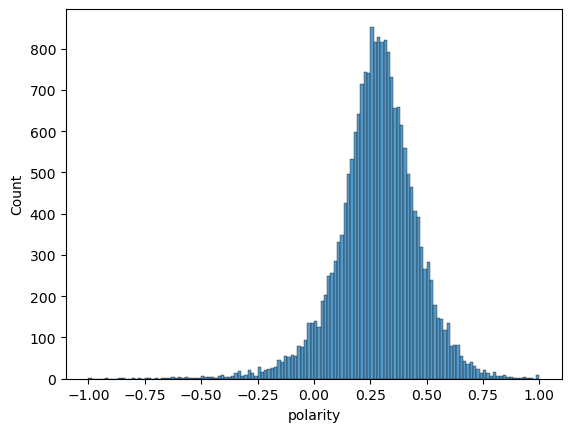

In [57]:
sns.histplot(text.polarity)
#plt.title('Polarity')

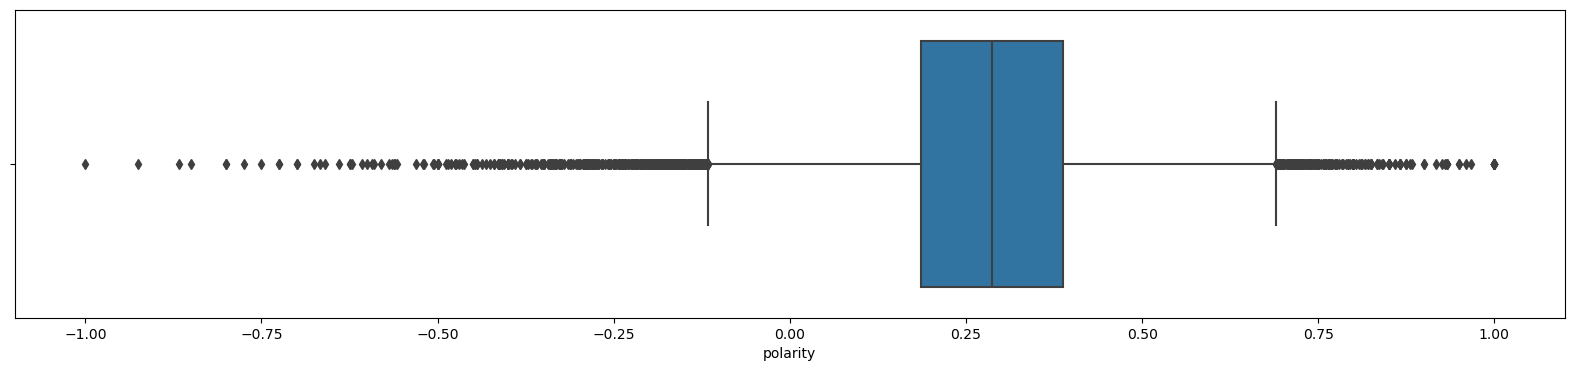

In [58]:
plt.figure(figsize=(20,4))
sns.boxplot(x=text['polarity'])
plt.show()

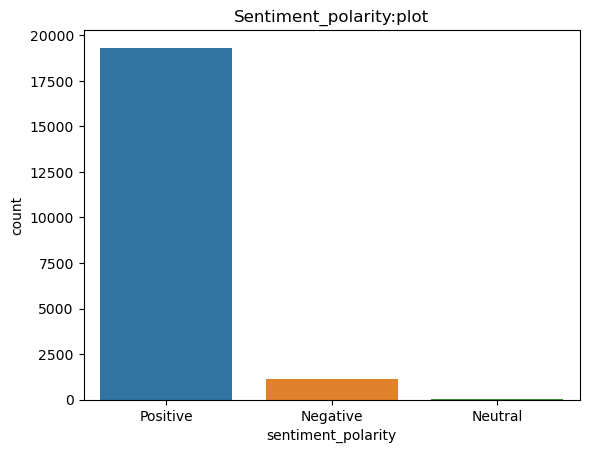

In [59]:
sns.countplot(text['sentiment_polarity'])
plt.title('Sentiment_polarity:plot')
plt.show()

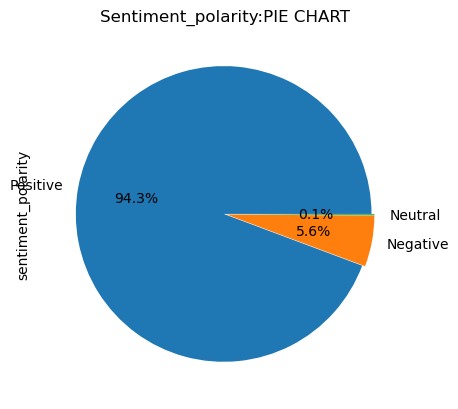

In [60]:
text.sentiment_polarity.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01],autopct='%.1f%%')
plt.title('Sentiment_polarity:PIE CHART')
plt.show()

### Finding Number of Characters

In [61]:
text['no_of_char']=text['Lemmitize_review'].apply(lambda x:len(x))
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmitize_review,subjectivity,polarity,sentiment_polarity,no_of_char
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.678095,0.198804,Positive,521
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.539858,0.248550,Positive,1521
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.591954,0.321429,Positive,1257
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,538
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.637088,0.467308,Positive,1091


In [62]:
text['no_of_char'].describe().round(2)

count    20491.00
mean       646.58
std        608.02
min         32.00
25%        306.00
50%        481.00
75%        769.00
max      12016.00
Name: no_of_char, dtype: float64

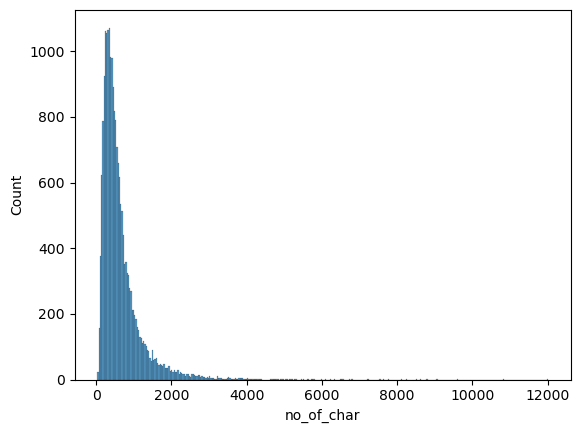

In [63]:
#plt.figure(figsize=(20,4))
sns.histplot(text['no_of_char'])
plt.show()

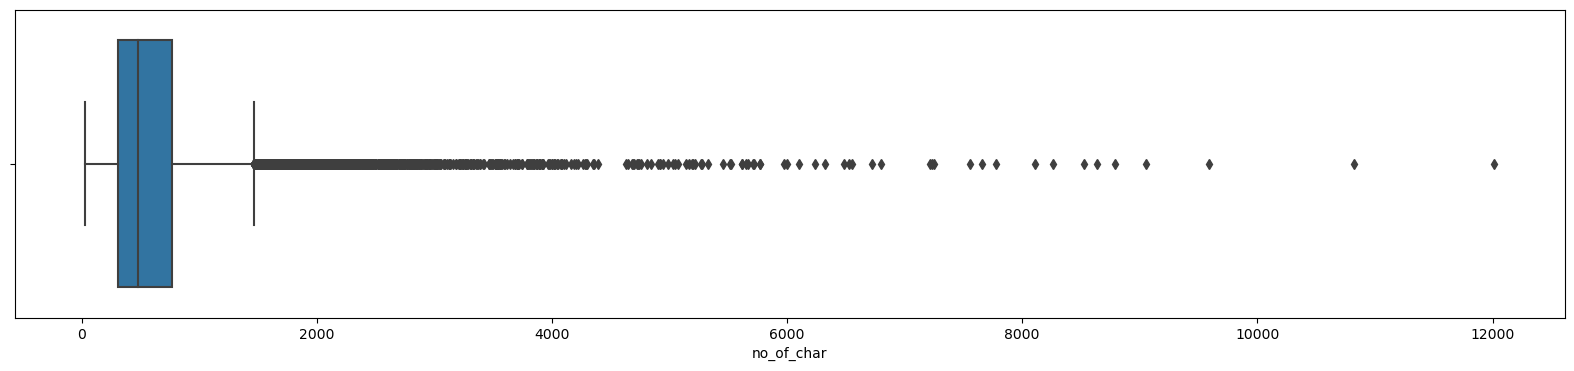

In [64]:
plt.figure(figsize=(20,4))
sns.boxplot(text['no_of_char'])
plt.show()

### Finding Number of words

In [65]:
text['no_of_words']=text['Lemmitize_review'].apply(lambda x :len(x.split(" ")))

In [66]:
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmitize_review,subjectivity,polarity,sentiment_polarity,no_of_char,no_of_words
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.678095,0.198804,Positive,521,80
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.539858,0.248550,Positive,1521,228
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.591954,0.321429,Positive,1257,189
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,538,83
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.637088,0.467308,Positive,1091,172


In [67]:
text['no_of_words'].describe().round(2)

count    20491.00
mean        96.70
std         92.34
min          6.00
25%         45.00
50%         71.00
75%        115.00
max       1821.00
Name: no_of_words, dtype: float64

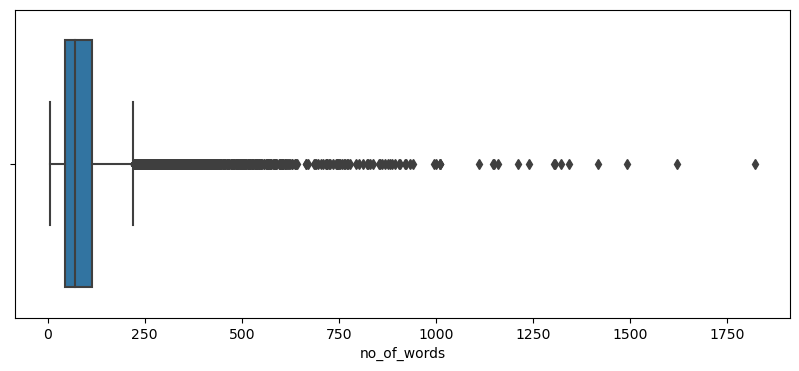

In [68]:
plt.figure(figsize=(10,4))
sns.boxplot(x=text['no_of_words'])
plt.show()

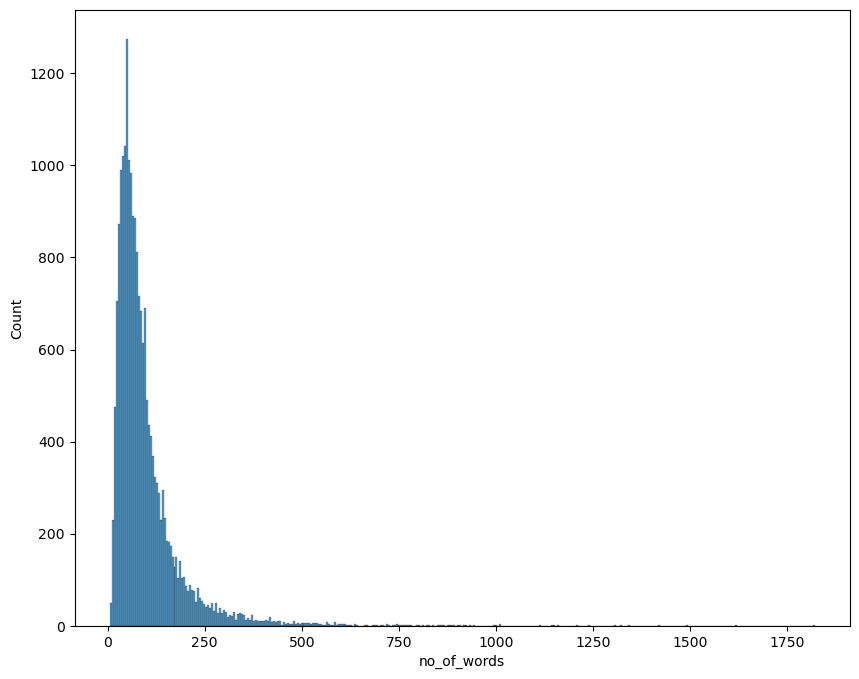

In [69]:
plt.figure(figsize=(10,8))
sns.histplot(x=text['no_of_words'])
plt.show()

### Most positive review

In [70]:
df_positive=text[text['no_of_words']>100].sort_values("polarity",ascending
                                                      =False)[["Lemmitize_review","Rating","sentiment_polarity"]]

In [71]:
df_positive.head(1)

,Lemmitize_review,Rating,sentiment_polarity
4731,brilliant berlin recently take city break berl...,5,Positive


In [72]:
text['Review'][4731]

"brilliant berlin recently took city break berlin couple friends stayed hilton, great choice turned, booked executive rooms excellent, tanya check n't helpful.the lounge perfect spot r r long day siteseeing, looks pictureque gendarmenmarkt beautiful cathedrals, breakfast lounge continental style buffet style breakfast main dining area fantastic, dinner brandenberg restaurant attached hotel superb, waiting staff attentive food delightful, marks service, hotel opinion ideally located exploring city stadmitte u bahn station literally door.we highly recommend hotel, recommend berlin walking tour commences starbucks brandenberg gate 1.15pm afternoon refugium restaurant french cathedral gendarmenmarkt, superb food excellent service, try hiring bike day tour sites tiergarten, concierge arranged matter minutes door 15 euro day,  "

### Most negative review

In [73]:
df_negative=text[text['no_of_words']>100].sort_values("polarity",ascending
                                                      =True)[["Lemmitize_review","Rating","polarity"]]

In [74]:
df_negative.head(1)

,Lemmitize_review,Rating,polarity
2498,terrible service stay friend decide stay hotel...,1,-0.462205


In [75]:
text['Review'][2498]

"terrible service n't stay, friend decided stay hotel reading review new york times, unfortunately stay turned horrible experience.on day hotel asked desk book tour following evening, assured taken care, morning dropped desk check status tour told not booked report lobby evening tour, came evening told tour booked angry disappointed having plans fall decided try, asked desk book tour day, time tour booked desk quoted wrong price repeatedly, told cost 110 checked twice make sure correct end tour guide told cost tour 110 person, felt disgusted let incompetence hotel desk.in addition went desk make known bad experiences encountered couple hotel lost luggage forgetting room brought, room-by-room search locate luggage, people encountered allocated room allocated, incompetence terribly unseemly hotel positive reviews various places.the final insult asked manager make concerns known manager question treated utmost disrespect brushing comments not taking seriously, response want book hotel con

### N-GRAM 

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
def top_n_words(df,n=None,n_gram=None):
    count=CountVectorizer(max_features=2000,ngram_range=n_gram).fit(df)
    bag_of_words=count.transform(df)
    sum_of_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_of_words[0,idx])for word,idx  in count.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x :x[1],reverse=True)
    return word_freq[:n]

### B-Gram

In [78]:
pos=text[text['sentiment_polarity']=='Positive']
neg=text[text['sentiment_polarity']=='Negative']

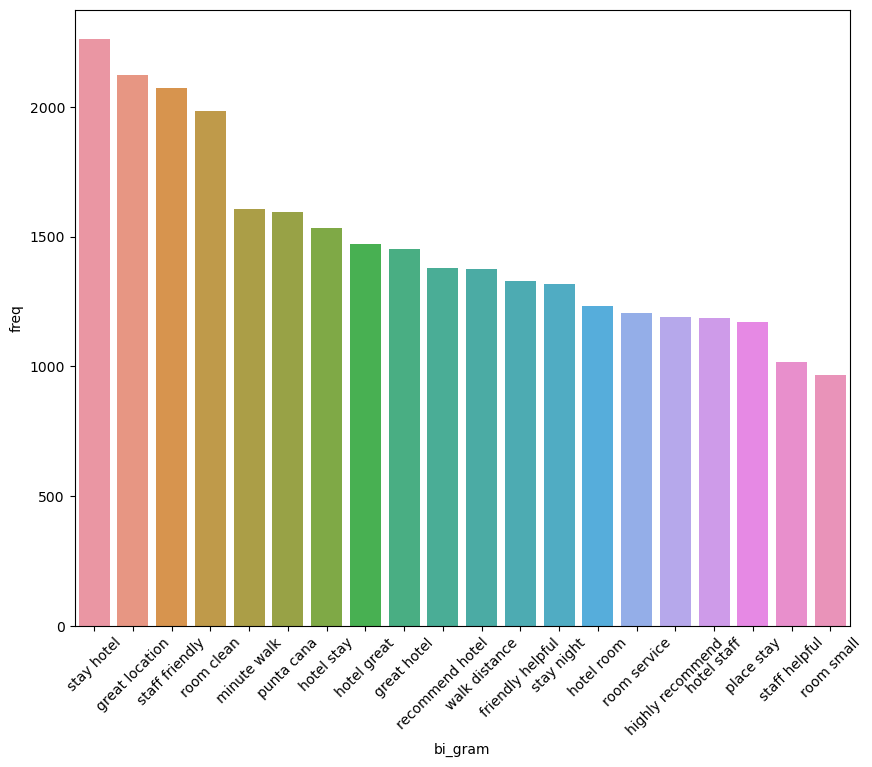

In [79]:
top_20_bigrams_pos=top_n_words(pos['Lemmitize_review'],n=20,n_gram=(2,2))
top_20_bigrams_pos=pd.DataFrame(top_20_bigrams_pos,columns=['bi_gram','freq'])
plt.figure(figsize=(10,8))
fig=sns.barplot(x='bi_gram',y='freq',data=top_20_bigrams_pos)
fig.set_xticklabels(rotation=45,labels=top_20_bigrams_pos['bi_gram'])
plt.show()

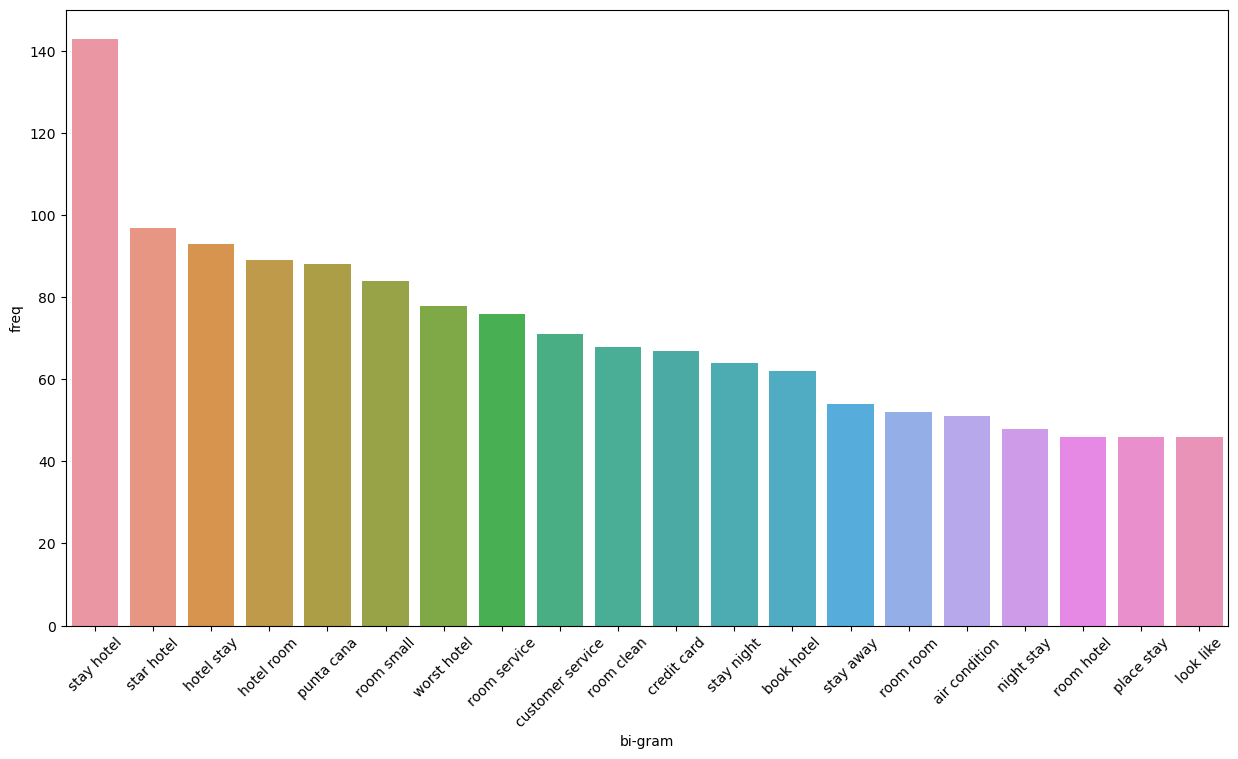

In [80]:
top_20_neg_bigram=top_n_words(neg['Lemmitize_review'],n=20,n_gram=(2,2))
top_20_neg_bigram=pd.DataFrame(top_20_neg_bigram,columns=['bi-gram','freq'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='bi-gram',y='freq',data=top_20_neg_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_neg_bigram['bi-gram'])
plt.show()

### TRI-GRAM

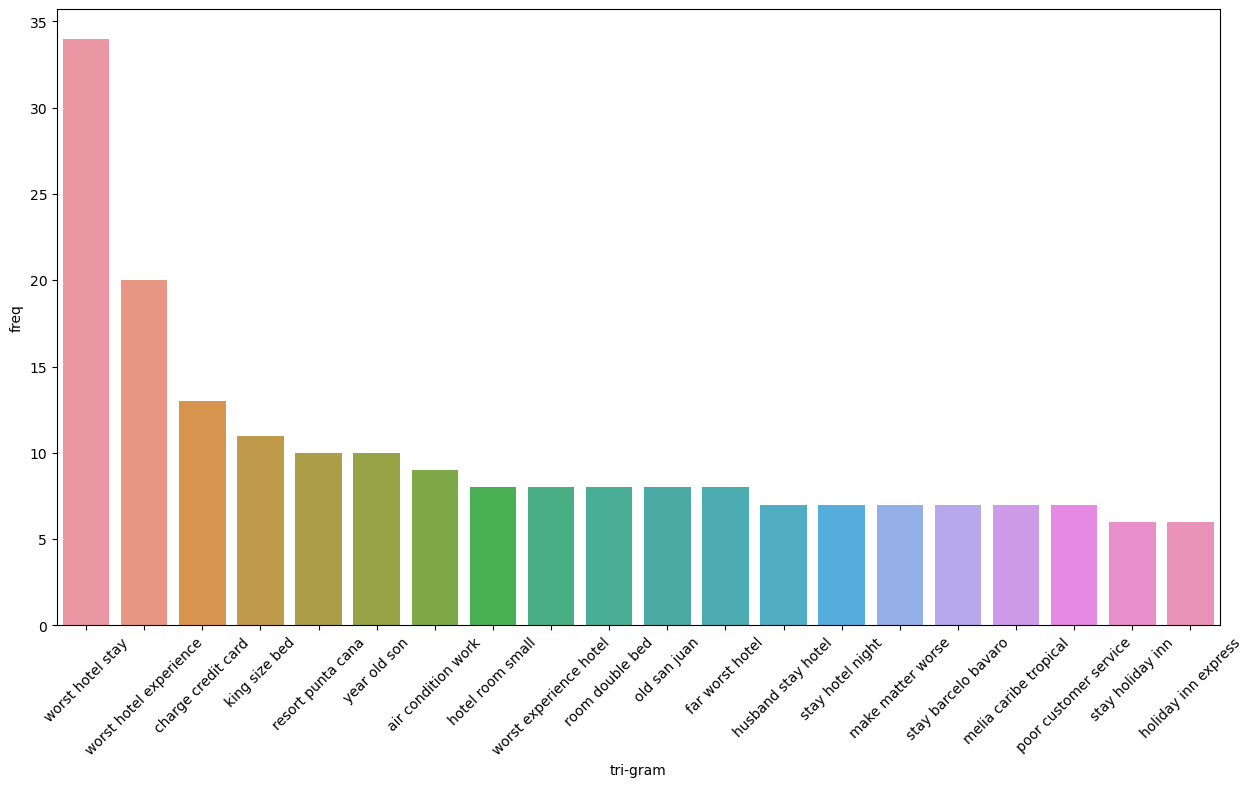

In [81]:
top_20_neg_bigram=top_n_words(neg['Lemmitize_review'],n=20,n_gram=(3,3))
top_20_neg_bigram=pd.DataFrame(top_20_neg_bigram,columns=['tri-gram','freq'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='freq',data=top_20_neg_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_neg_bigram['tri-gram'])
plt.show()

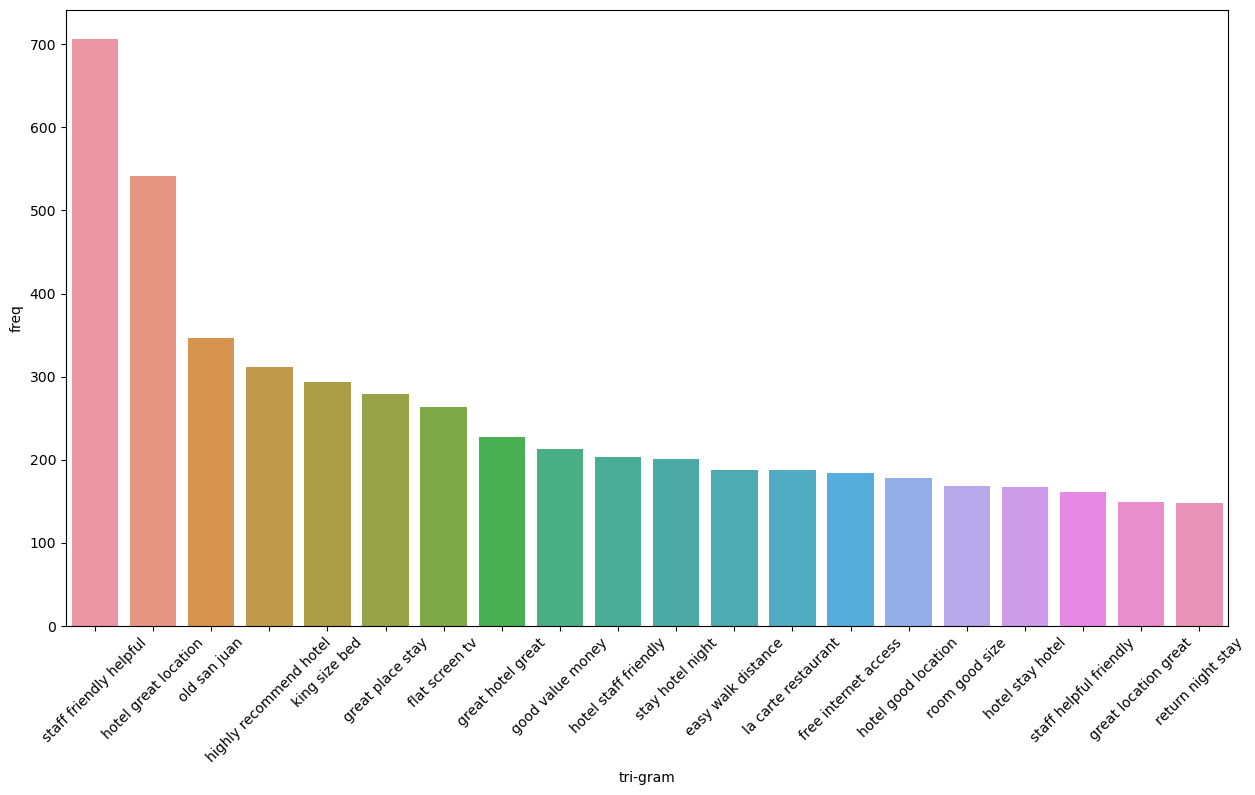

In [82]:
top_20_pos_trigram=top_n_words(pos['Lemmitize_review'],n=20,n_gram=(3,3))
top_20_pos_trigram=pd.DataFrame(top_20_pos_trigram,columns=['tri-gram','freq'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='freq',data=top_20_pos_trigram)
fig.set_xticklabels(rotation=45,labels=top_20_pos_trigram['tri-gram'])
plt.show()

### WORDCLOUD

In [83]:
from wordcloud import WordCloud

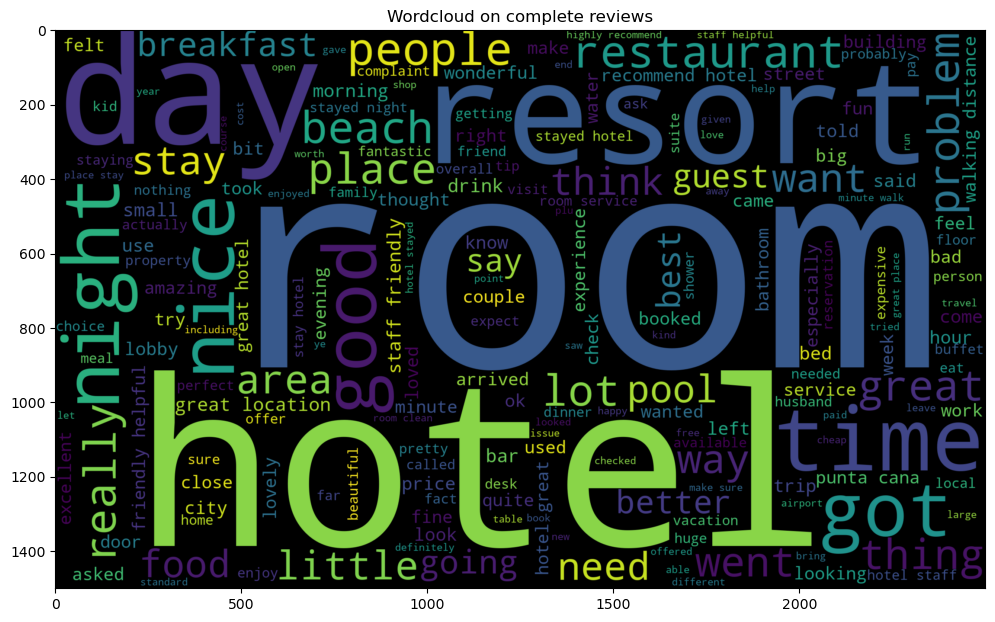

In [84]:
# from compelete reviews
string=" ".join(sen for sen in text['clean_review'])
word_cloud=WordCloud(width=2500,height=1500).generate(string)
plt.figure(figsize=(12,9))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Wordcloud on complete reviews')
plt.show()

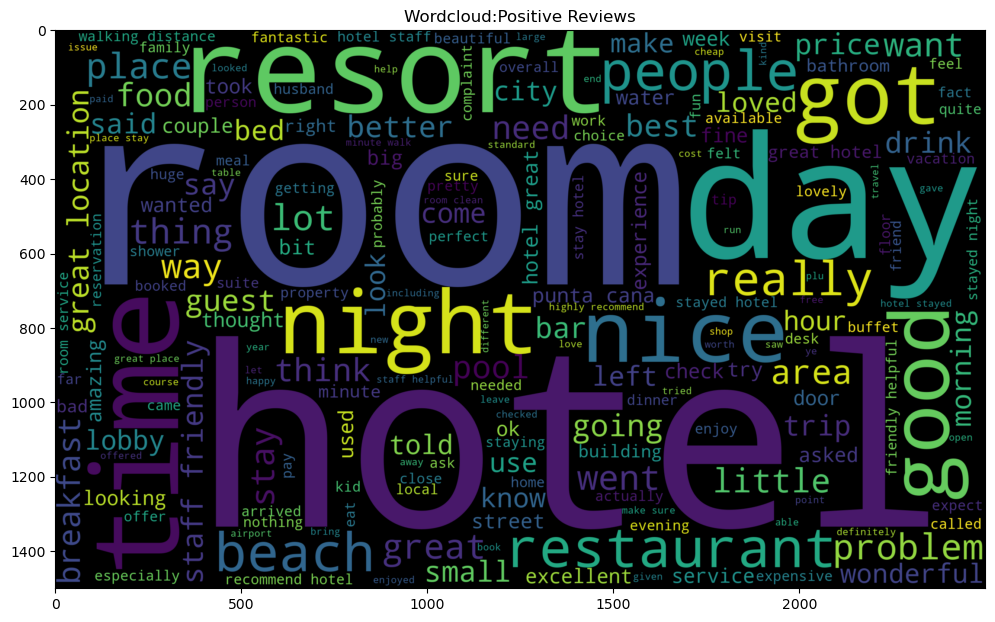

In [106]:
positive_reviews=" ".join([sen for sen in text['clean_review'][text['rating_analysis']=='Positive']])
word_cloud=WordCloud(width=2500,height=1500).generate(string)
plt.figure(figsize=(12,9))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Wordcloud:Positive Reviews')
plt.show()

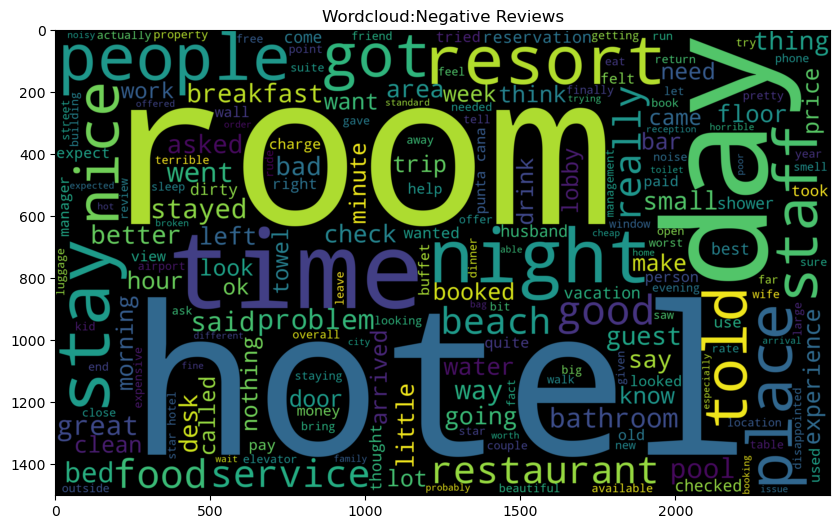

In [105]:
negative_reviews=" ".join([ sen for sen in text['clean_review'][text['rating_analysis']=='Negative']])
word_cloud=WordCloud(width=2500,height=1500).generate(negative_reviews)
plt.figure(figsize=(10,8))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Wordcloud:Negative Reviews')
plt.show()

In [107]:
# saving data into csv for model buiding pov
text.to_csv('text.csv')